# Product Job Market Analysis

### by Yueh-Han Chen

### Dataset Overview

> This dataset is from h1bdata.info, where has the h1b disclosure data from the United States Department of Labor (DOL).


### Research Question:
1. Which is the most popular Product job?
2. H1B issue amounts over years?
3. Which Product job gets paid the highest salary?
4. H1B denial rate over years?
5. Waiting days for H1B?
6. Which states offer the most H1B?
7. Which states offer the highest salaries?


## Data Wrangling

### Gather

In [32]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [33]:
#load data
df = pd.read_excel('Product_Data.xlsx', 'Combined')

### Data Assessing

In [34]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
df.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,TRUE FABRICATIONS INC,PRODUCT MANAGER,30000,"SEATTLE, WA",01/15/2015,2015-01-04 00:00:00,DENIED
1,PARIS BAGUETTE BON DOUX INC,PRODUCT MANAGER,36000,"COMMERCE, CA",2017-10-03 00:00:00,2017-01-09 00:00:00,CERTIFIED
2,TRUE FABRICATIONS INC,PRODUCT MANAGER,40000,"SEATTLE, WA",01/26/2015,2015-01-04 00:00:00,CERTIFIED
3,LEEWARD INTERNATIONAL INC,PRODUCT MANAGER,42140,"TEANECK, NJ",03/18/2015,09/15/2015,CERTIFIED
4,SOUTH STREET INDUSTRIES INC,PRODUCT MANAGER,42740,"NEW YORK, NY",2015-09-07 00:00:00,2015-01-10 00:00:00,CERTIFIED


In [36]:
df.shape

(6444, 7)

In [37]:
df.describe()

,BASE SALARY
count,6444.000000
mean,122716.790658
std,37290.470430
min,4750.000000
25%,96013.000000
50%,120000.000000
75%,143365.500000
max,315000.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 7 columns):
EMPLOYER       6444 non-null object
JOB TITLE      6444 non-null object
BASE SALARY    6444 non-null int64
LOCATION       6444 non-null object
SUBMIT DATE    6444 non-null object
START DATE     6444 non-null object
CASE STATUS    6444 non-null object
dtypes: int64(1), object(6)
memory usage: 352.5+ KB


In [39]:
df[df.duplicated()].shape[0]

122

### Assessment report:

**Quality issues**

- Convert "SUBMIT DATE" and "START DATE" to datetime

### Data Cleaning

**Convert "SUBMIT DATE" and "START DATE" to datetime**

**Define: use pd.to_datetime to convert data type to datetime**

#### Code

In [9]:
df["SUBMIT DATE"] = pd.to_datetime(df["SUBMIT DATE"])
df["START DATE"] = pd.to_datetime(df["START DATE"])

#### Test

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 7 columns):
EMPLOYER       6444 non-null object
JOB TITLE      6444 non-null object
BASE SALARY    6444 non-null int64
LOCATION       6444 non-null object
SUBMIT DATE    6444 non-null datetime64[ns]
START DATE     6444 non-null datetime64[ns]
CASE STATUS    6444 non-null object
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 352.5+ KB


## Exploratory Data Analysis

> Build Visualization Function: desc()

In [11]:
def desc(size=None, title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    # this function must be placed above the code of the plots
    if size:
        plt.figure(figsize=size)
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

## Research Question 1: Proportion by Differrent Product Job 

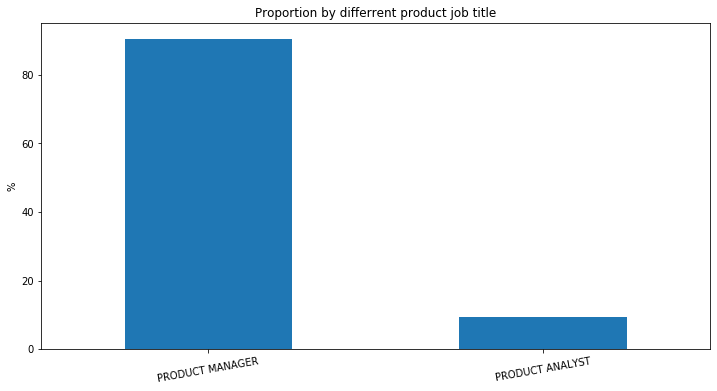

In [12]:
desc(title='Proportion by differrent product job title', ylabel='%', size=(12,6))
((df['JOB TITLE'].value_counts()/df.shape[0])*100).plot.bar()
plt.xticks(rotation=10);

## Research Question 2: H1B issue amounts over years?

In [18]:
df['JOB TITLE'].value_counts()

PRODUCT MANAGER    5840
PRODUCT ANALYST     604
Name: JOB TITLE, dtype: int64

In [19]:
df_PM = df[df['JOB TITLE'] == 'PRODUCT MANAGER']
df_PA = df[df['JOB TITLE'] == 'PRODUCT ANALYST']

In [20]:
df_PM['year'] = df_PM['SUBMIT DATE'].dt.year
df_PA['year'] = df_PA['SUBMIT DATE'].dt.year

In [21]:
temp1 = df_PM.year.value_counts().to_frame()
temp1.rename(columns={'year':'PRODUCT MANAGER'}, inplace=True)

temp2 = df_PA.year.value_counts().to_frame()
temp2.rename(columns={'year':'PRODUCT ANALYST'}, inplace=True)


In [22]:
df_list = [temp1, temp2]
for d in df_list:
    d['Year'] = 0
    for i in range(0,d.shape[0]):
        d['Year'][i:i+1] = d[i:i+1].index.values[0]

In [23]:
temp1.sort_values(by='Year', ascending=False, inplace = True)
temp2.sort_values(by='Year', ascending=False, inplace = True)

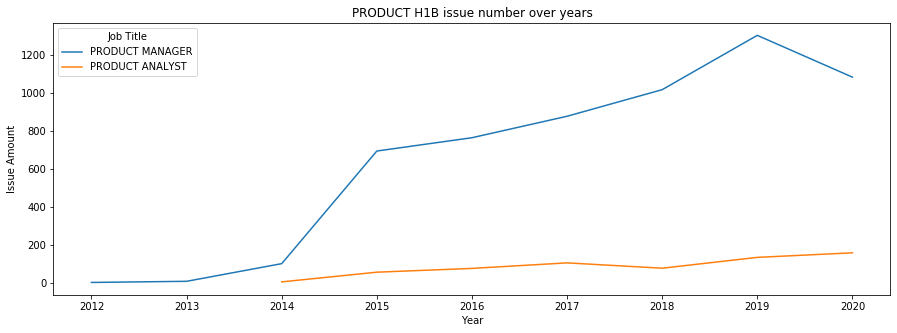

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot('Year', 'PRODUCT MANAGER', data=temp1) 
ax.plot('Year', 'PRODUCT ANALYST', data=temp2) 
desc(title='PRODUCT H1B issue number over years', xlabel = 'Year', ylabel='Issue Amount' , legend_title='Job Title')

## Research Question 3: H1B approval rate over years?

In [25]:
df['CASE STATUS'].value_counts()

CERTIFIED                6118
WITHDRAWN                 202
DENIED                     76
CERTIFIED - WITHDRAWN      48
Name: CASE STATUS, dtype: int64

In [26]:
temp1['Approval_rate'] = None
temp2['Approval_rate'] = None

for y in range(2015, 2021):
    temp1['Approval_rate'][y] = round(df_PM[(df_PM.year == y) & (df_PM['CASE STATUS'] == "CERTIFIED")].shape[0]/df_PM[df_PM.year == y].shape[0], 3)
for y in range(2015, 2021):
    temp2['Approval_rate'][y] = round(df_PA[(df_PA.year == y) & (df_PA['CASE STATUS'] == "CERTIFIED")].shape[0]/df_PA[df_PA.year == y].shape[0], 3)

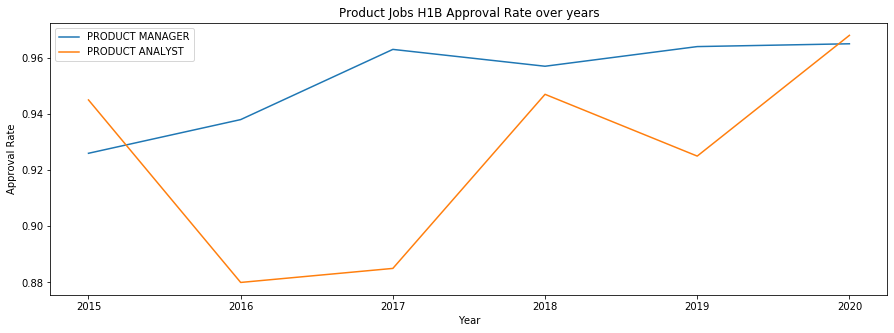

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot('Year', 'Approval_rate', data=temp1) 
ax.plot('Year', 'Approval_rate', data=temp2) 
desc(title='Product Jobs H1B Approval Rate over years', xlabel = 'Year', ylabel='Approval Rate' , legend_title='Job Title')
ax.legend(['PRODUCT MANAGER',"PRODUCT ANALYST"]);

## Research Question 4: Waiting days for H1B?

In [28]:
df['waiting_days'] = None
for i in range(0, df.shape[0]):
    if (df['START DATE'][i:i+1] - df['SUBMIT DATE'][i:i+1])[i].days >= 0:
        df['waiting_days'][i:i+1] = (df['START DATE'][i:i+1] - df['SUBMIT DATE'][i:i+1])[i].days
    else:
        df['waiting_days'][i:i+1] = -1

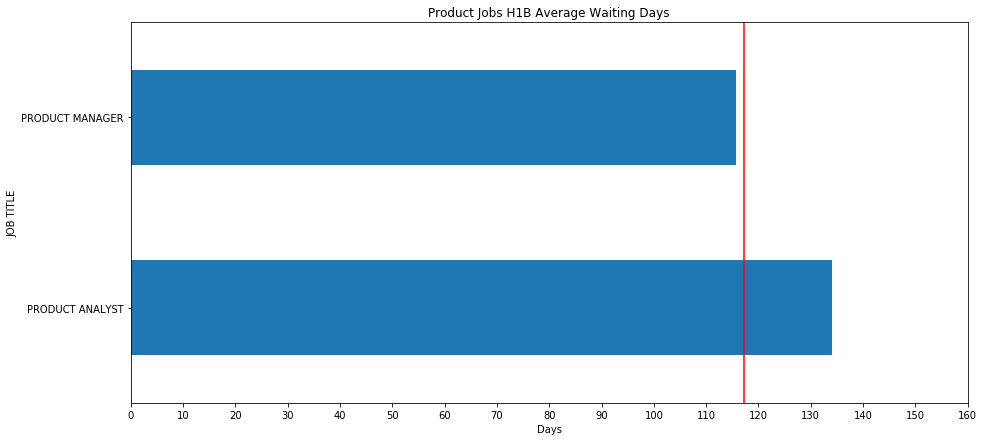

In [29]:
df_have_waiting_days = df[(df['waiting_days'] != -1) & (df['CASE STATUS'] == 'CERTIFIED')]
desc(title='Product Jobs H1B Average Waiting Days', xlim=(0,160), xlabel = 'Days', size=(15,7), xticks1=range(0,170,10))
df_have_waiting_days.groupby('JOB TITLE')['waiting_days'].mean().plot.barh()
plt.axvline(x=df_have_waiting_days['waiting_days'].mean(), color = 'red');

In [30]:
df_have_waiting_days.mean()

BASE SALARY     124615.607424
waiting_days       117.153392
dtype: float64

> Note: Product H1B Waiting Days in average is **117 days, which is lower than the average H1b processing time(6 months)**, according to https://www.immi-usa.com/h1b-processing-time/

## Research Question 5 Which states offer the most H1B for product roles?

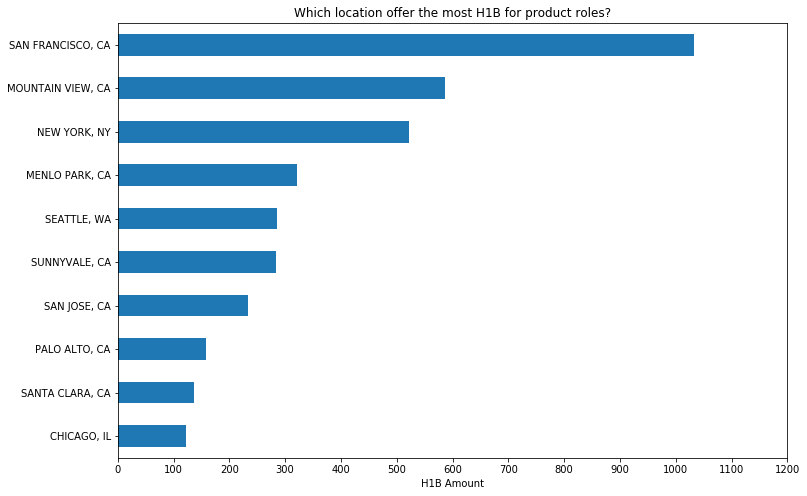

In [31]:
desc(title='Which location offer the most H1B for product roles?', xlim=(0,1200), xlabel = 'H1B Amount', size=(12,8),xticks1=(range(0,1300,100)))
df.LOCATION.value_counts()[0:10].sort_values().plot.barh();

In [70]:
df.LOCATION.value_counts()[0:10].sort_values()/df.LOCATION.shape[0]

CHICAGO, IL          0.018932
SANTA CLARA, CA      0.021260
PALO ALTO, CA        0.024519
SAN JOSE, CA         0.036313
SUNNYVALE, CA        0.043917
SEATTLE, WA          0.044382
MENLO PARK, CA       0.049969
NEW YORK, NY         0.081006
MOUNTAIN VIEW, CA    0.090937
SAN FRANCISCO, CA    0.160304
Name: LOCATION, dtype: float64

## Research Question 7: Which states offer the highest salaries?

In [63]:
entry_level = df[df['BASE SALARY'] < 110000]

In [64]:
df_top_locations = entry_level[entry_level.LOCATION == 'NEW YORK, NY']
for city in entry_level.LOCATION.value_counts()[1:10].index:
    df_top_locations = df_top_locations.append(entry_level[entry_level.LOCATION == city])

In [65]:
list = df_top_locations.groupby('LOCATION')['BASE SALARY'].median().sort_values().index

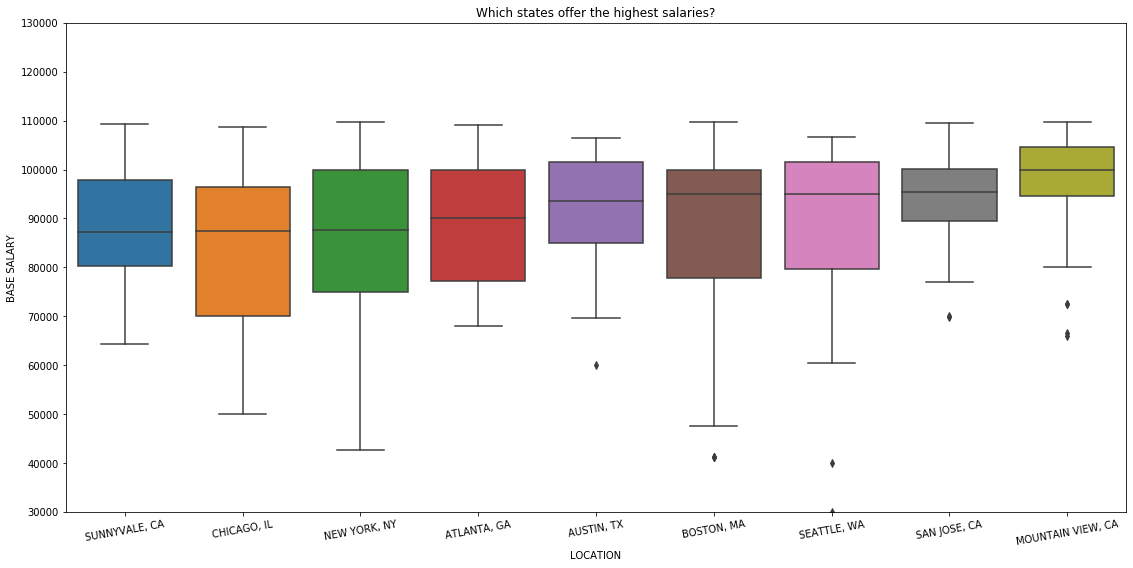

In [68]:
desc(title='Which states offer the highest salaries?', ylim=(30000,110000), yticks1=range(30000,140000,10000), size=(19,9))
sb.boxplot(data = df_top_locations, x = 'LOCATION', y = 'BASE SALARY', order=list)
plt.xticks( rotation = 10 );

## Conclusion

> Limitation 1: All these data are disclosure date from h1bdata.info, so we don't know how many unpublished data out there. Therefore, we should have some degree doubt the numbers presented above.

- Two main product roles for business majors: Product Manager(60%) & Product Analyst(35%)
- Salary Rank: Product Manager > Product Analyst
- Location(Salary): Mountain View > San Jose > Seattle
- Location(H1B): San Francisco(16%) > Mountain View(9%) > New York(8%) 
- Product Analyst/Manager H1B issue amount and approval rate all have been  increasing over the past few years.
